# Expedia Consumer Analysis


### Intro

This research project focuses on analyzing traveler behavior patterns, crafting data-driven insights, and developing effective marketing strategies that will enhance how Expedia's travel partners engage with customers throughout their decision-making process. By understanding the nuanced ways sponsored travel content influences consumer choices at different stages of the travel planning journey, we can optimize content strategy, improve conversion rates, and create more meaningful connections between travelers and travel providers.

The insights generated from this analysis will enable Expedia's partners to deliver more targeted, relevant, and effective sponsored content that resonates with consumers' evolving needs and preferences in an increasingly competitive marketplace.

I have conducted a Consumer insights survey and gained over a 1000 responses, with these responses I hope to be able to identify key demographics and their social media habits.

# Data Import and Cleaning

In [2551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Expedia_Consumer_Survey_Responses.csv', encoding='utf-8')

# Basic info about the dataset
print("Dataset shape:", df.shape)
print("\
Column names:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Dataset shape: (1069, 24)
Column names:
1. Timestamp
2. gender
3. What is your age group?
4. How often do you plan and book leisure travel (vacations, weekend trips, etc.)?
5. How much do you spend on a typical trip?
6. What type of trips do you most enjoy? (Select up to 3)
7. How often do you use Social media platforms (Instagram, Facebook, TikTok) such as Facebook, Twitter, TikTok, Instagram, Youtube?
8. Which Social media platforms (Instagram, Facebook, TikTok) Platform do you use the most?
9. Have you ever come across a sponsored travel post or ad while browsing Social media platforms (Instagram, Facebook, TikTok)?
10. If Yes: Which platform do you recall seeing sponsored travel content on most often?
11. When you see sponsored travel content, how likely are you to take the following actions?
12. Sponsored travel content helps me discover destinations or experiences I might not have considered otherwise?
13. Which sources do you typically use FIRST when starting to research a new t

In [2553]:
# Hidden css: CSS for the grid layout
css = """
<style>
.grid-container {
    display: grid;
    grid-template-columns: 1fr 1fr;
    gap: 20px;
    margin-bottom: 20px;
}
.table-container {
    border: 1px solid #e0e0e0;
    border-radius: 5px;
    padding: 10px;
    background-color: white;
}
.demographic-table {
    width: 100%;
    border-collapse: collapse;
}
.demographic-table th, .demographic-table td {
    padding: 8px;
    text-align: left;
    border-bottom: 1px solid #ddd;
}
.demographic-table th {
    background-color: #f2f2f2;
}
h3 {
    margin-top: 0;
    color: #333;
}
</style>
"""

# CSS for the grid layout (enhanced for crosstabs)
css = """
<style>
.grid-container {
    display: grid;
    grid-template-columns: 1fr 1fr;
    gap: 20px;
    margin-bottom: 20px;
}
.table-container {
    border: 1px solid #e0e0e0;
    border-radius: 5px;
    padding: 10px;
    background-color: white;
}
.crosstab-table {
    width: 100%;
    border-collapse: collapse;
    margin-top: 10px;
}
.crosstab-table th, .crosstab-table td {
    padding: 8px;
    text-align: center;
    border: 1px solid #ddd;
}
.crosstab-table th {
    background-color: #f2f2f2;
    font-weight: bold;
}
.crosstab-table tr:hover {
    background-color: #f5f5f5;
}
h3 {
    margin-top: 0;
    color: #333;
    border-bottom: 1px solid #eee;
    padding-bottom: 5px;
}
.pct-table {
    width: 100%;
    margin-top: 15px;
}
</style>
"""


In [2555]:
# Cleaning up column names for easier analysis
df.columns = [
    'timestamp', 'gender', 'age_group', 'travel_frequency', 'spending_amount',
    'trip_types', 'social_media_usage', 'primary_social_platform', 
    'seen_sponsored_ads', 'sponsored_platform', 'sponsored_action_likelihood',
    'sponsored_discovery_agreement', 'research_sources', 'helpful_content_type',
    'notice_sponsored_frequency', 'trust_ugc_vs_professional', 'planning_duration',
    'research_device', 'seek_opinions_frequency', 'desired_features',
    'booking_influence_description', 'trust_engagement_suggestions', 'name', 'email'
]

# Display basic info and first few rows
print("Dataset Overview:")
print(f"Total responses: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("\
First 5 rows:")
df.head()

Dataset Overview:
Total responses: 1069
Columns: 24
First 5 rows:


,timestamp,gender,age_group,travel_frequency,spending_amount,trip_types,social_media_usage,primary_social_platform,seen_sponsored_ads,sponsored_platform,sponsored_action_likelihood,sponsored_discovery_agreement,research_sources,helpful_content_type,notice_sponsored_frequency,trust_ugc_vs_professional,planning_duration,research_device,seek_opinions_frequency,desired_features,booking_influence_description,trust_engagement_suggestions,name,email
0,2025-06-05,Male,60,Less than once per year,more than $2500,"Visiting friends or family, Cultural / historical experiences, City breaks",Never,None At All,No,NaN,Ignore,Agree,Friends and family recommendations,Price comparisons and deals,Always notice,Disagree,1-3 weeks,Laptop,Often,Budget calculators or cost breakdowns,Sample.,Sample.,User0_0,user0_0@example.com
1,2025-03-21,Female,60,Less than once per year,more than $2500,"Visiting friends or family, City breaks, Wellness / relaxation retreats",Never,None At All,No,NaN,Ignore,Agree,Friends and family recommendations,Price comparisons and deals,Always notice,Disagree,1-3 weeks,Laptop,Often,Budget calculators or cost breakdowns,Sample.,Sample.,User0_1,user0_1@example.com
2,2025-06-17,Female,60,Less than once per year,more than $2500,"Adventure / outdoor activities, Luxury travel, Cultural / historical experiences",Never,None At All,No,NaN,Ignore,Agree,Friends and family recommendations,Price comparisons and deals,Always notice,Disagree,1-3 weeks,Laptop,Often,Budget calculators or cost breakdowns,Sample.,Sample.,User0_2,user0_2@example.com
3,2025-03-26,Female,60,Less than once per year,more than $2500,"Budget travel, Beach holidays, Luxury travel",Never,None At All,No,NaN,Ignore,Agree,Friends and family recommendations,Price comparisons and deals,Always notice,Disagree,1-3 weeks,Laptop,Often,Budget calculators or cost breakdowns,Sample.,Sample.,User0_3,user0_3@example.com
4,2025-03-04,Male,60,Less than once per year,more than $2500,"Luxury travel, Cultural / historical experiences, Wellness / relaxation retreats",Never,None At All,No,NaN,Ignore,Agree,Friends and family recommendations,Price comparisons and deals,Always notice,Disagree,1-3 weeks,Laptop,Often,Budget calculators or cost breakdowns,Sample.,Sample.,User0_4,user0_4@example.com


# Demographic Analysis

Before diving into clustering analysis and marketing strategy development, it's essential to understand the fundamental characteristics of our dataset through demographic analysis. This exploratory step provides crucial insights that will inform our clustering approach and validate our eventual marketing segmentation strategy.

## Key Demographic Dimensions

We will examine the dataset across four critical demographic dimensions:

### **Gender Distribution**
- Understanding gender representation in our travel customer base
- Identifying potential gender-based preferences or behaviors

### **Age Groups**
- Analyzing generational differences in travel behavior and preferences
- Identifying age-specific marketing opportunities

### **Trip Spending Patterns**
- Examining the distribution of spending levels across customers
- Understanding budget preferences and willingness to pay
- Identifying potential revenue opportunities and price sensitivity

### **Travel Frequency**
- Analyzing how often customers travel throughout the year
- Identifying frequent vs. occasional travelers for targeted strategies

In [2558]:

def create_demographic_table(df, column_name, display_name):
    counts = df[column_name].value_counts()
    percentages = round(df[column_name].value_counts(normalize=True) * 100, 1)
    
    result = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage (%)': percentages.values
    })
    
    # Format the table as HTML with CSS
    table_html = result.to_html(index=False, classes='demographic-table')
    return f"""
    <div class="table-container">
        <h3>{display_name}</h3>
        {table_html}
    </div>
    """

# Create the tables
tables_html = f"""
<div class="grid-container">
    {create_demographic_table(df, 'gender', 'Gender Distribution')}
    {create_demographic_table(df, 'age_group', 'Age Group Distribution')}
    {create_demographic_table(df, 'travel_frequency', 'Travel Frequency Distribution')}
    {create_demographic_table(df, 'spending_amount', 'Trip Spending')}
</div>
"""

# Display everything
display(HTML(css + tables_html))

Category,Count,Percentage (%)
Male,516,48.3
Female,513,48.0
Non-Binary,33,3.1
Prefer not to say,7,0.7
Category,Count,Percentage (%)
25-34,299,28.0
18-24,256,23.9
35-44,240,22.5
60,207,19.4
45-60,67,6.3


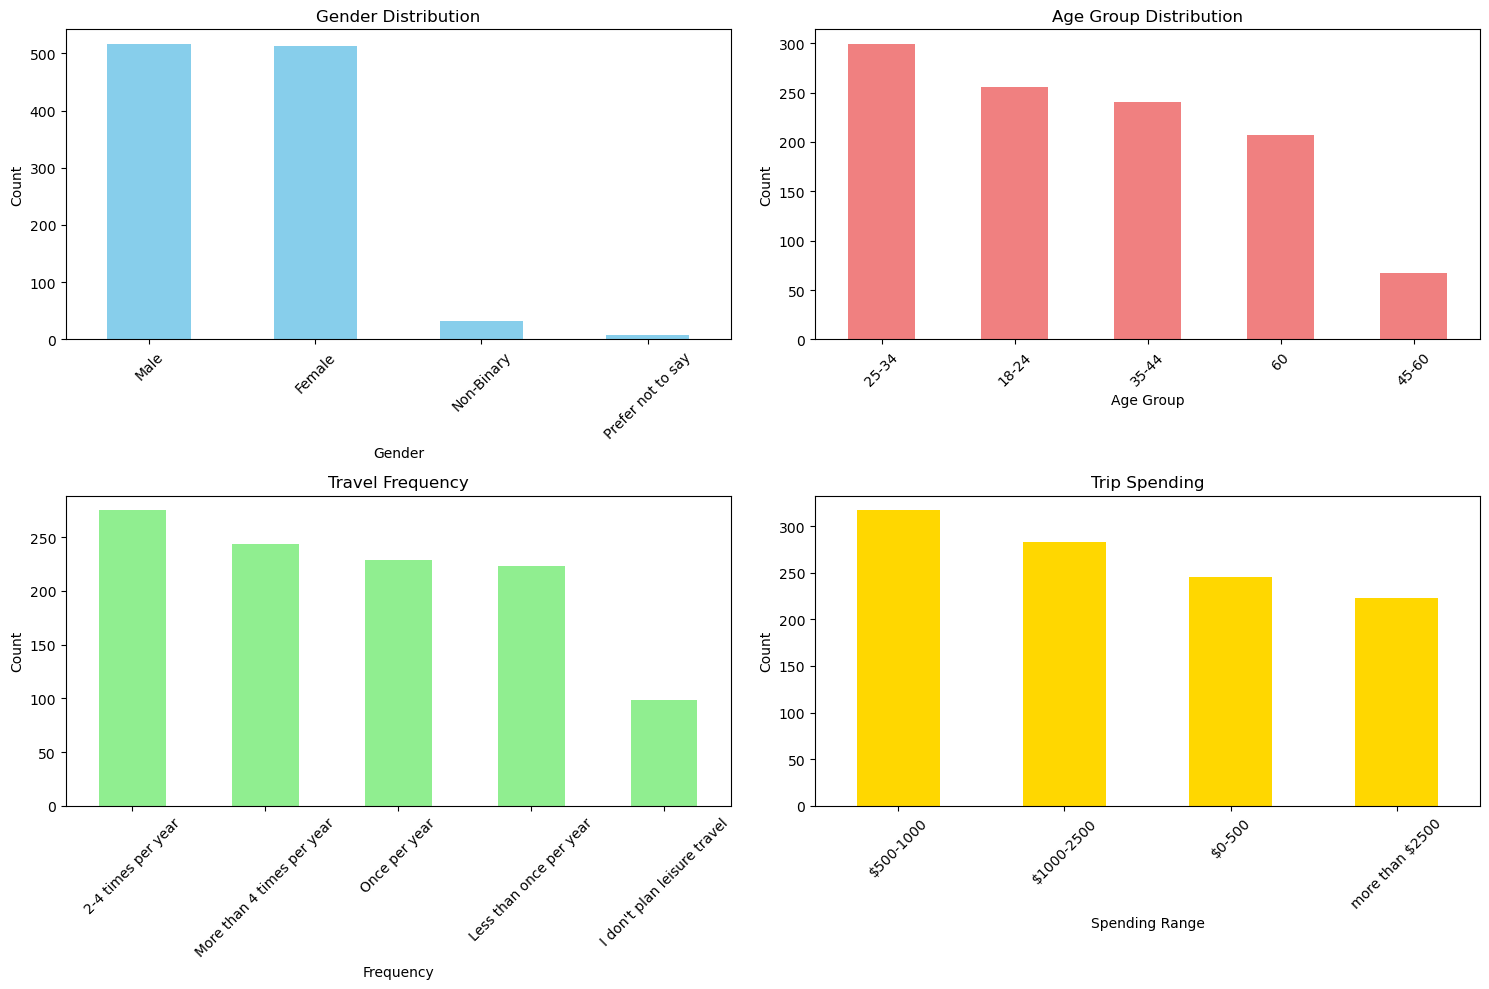

Demographics summary complete.


In [2560]:
# Create visualizations for key demographic trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution
df['gender'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Gender Distribution')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Age group distribution
df['age_group'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Age Group Distribution')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Travel frequency
df['travel_frequency'].value_counts().plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Travel Frequency')
axes[1,0].set_xlabel('Frequency')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Trip spending
df['spending_amount'].value_counts().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Trip Spending')
axes[1,1].set_xlabel('Spending Range')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Demographics summary complete.")


## Demographic Insights

- The sample is very well balanced with nearly equal representation of males (48.3%) and females (48.0%), plus a small but meaningful representation of non-binary respondents (3.1%).
- The largest segments are 25-34 year-olds (28.0%) and 18-24 year-olds (23.9%), indicating a younger-skewed sample that's highly relevant for digital marketing strategies.
- Most respondents are active travelers - 48.5% travel 2+ times per year, with only 9.2% not planning leisure travel at all.
- The spending is fairly distributed across ranges, with the largest group spending 500-1000 per trip (29.7%), followed by 1000-2500 (26.5%).

## Social media behavior analysis

In [2563]:
tables_html = f"""
<div class="grid-container">
    {create_demographic_table(df, 'social_media_usage', 'Social Media Usage')}
    {create_demographic_table(df, 'primary_social_platform', 'Primary Platform')}
    {create_demographic_table(df, 'seen_sponsored_ads', ' Seen Sponsored Ads ')}
    {create_demographic_table(df, 'sponsored_action_likelihood', 'Action to Sponsored Content')}
</div>
"""

# Display everything
display(HTML(css + tables_html))

Category,Count,Percentage (%)
Mulitple times a day,289,27.0
Several times a week,266,24.9
Once a day,234,21.9
Never,204,19.1
Weekly,76,7.1
Category,Count,Percentage (%)
Instagram,297,27.8
Youtube,239,22.4
TikTok,221,20.7
None At All,189,17.7


In [2565]:
### Cross Tabular Analysis

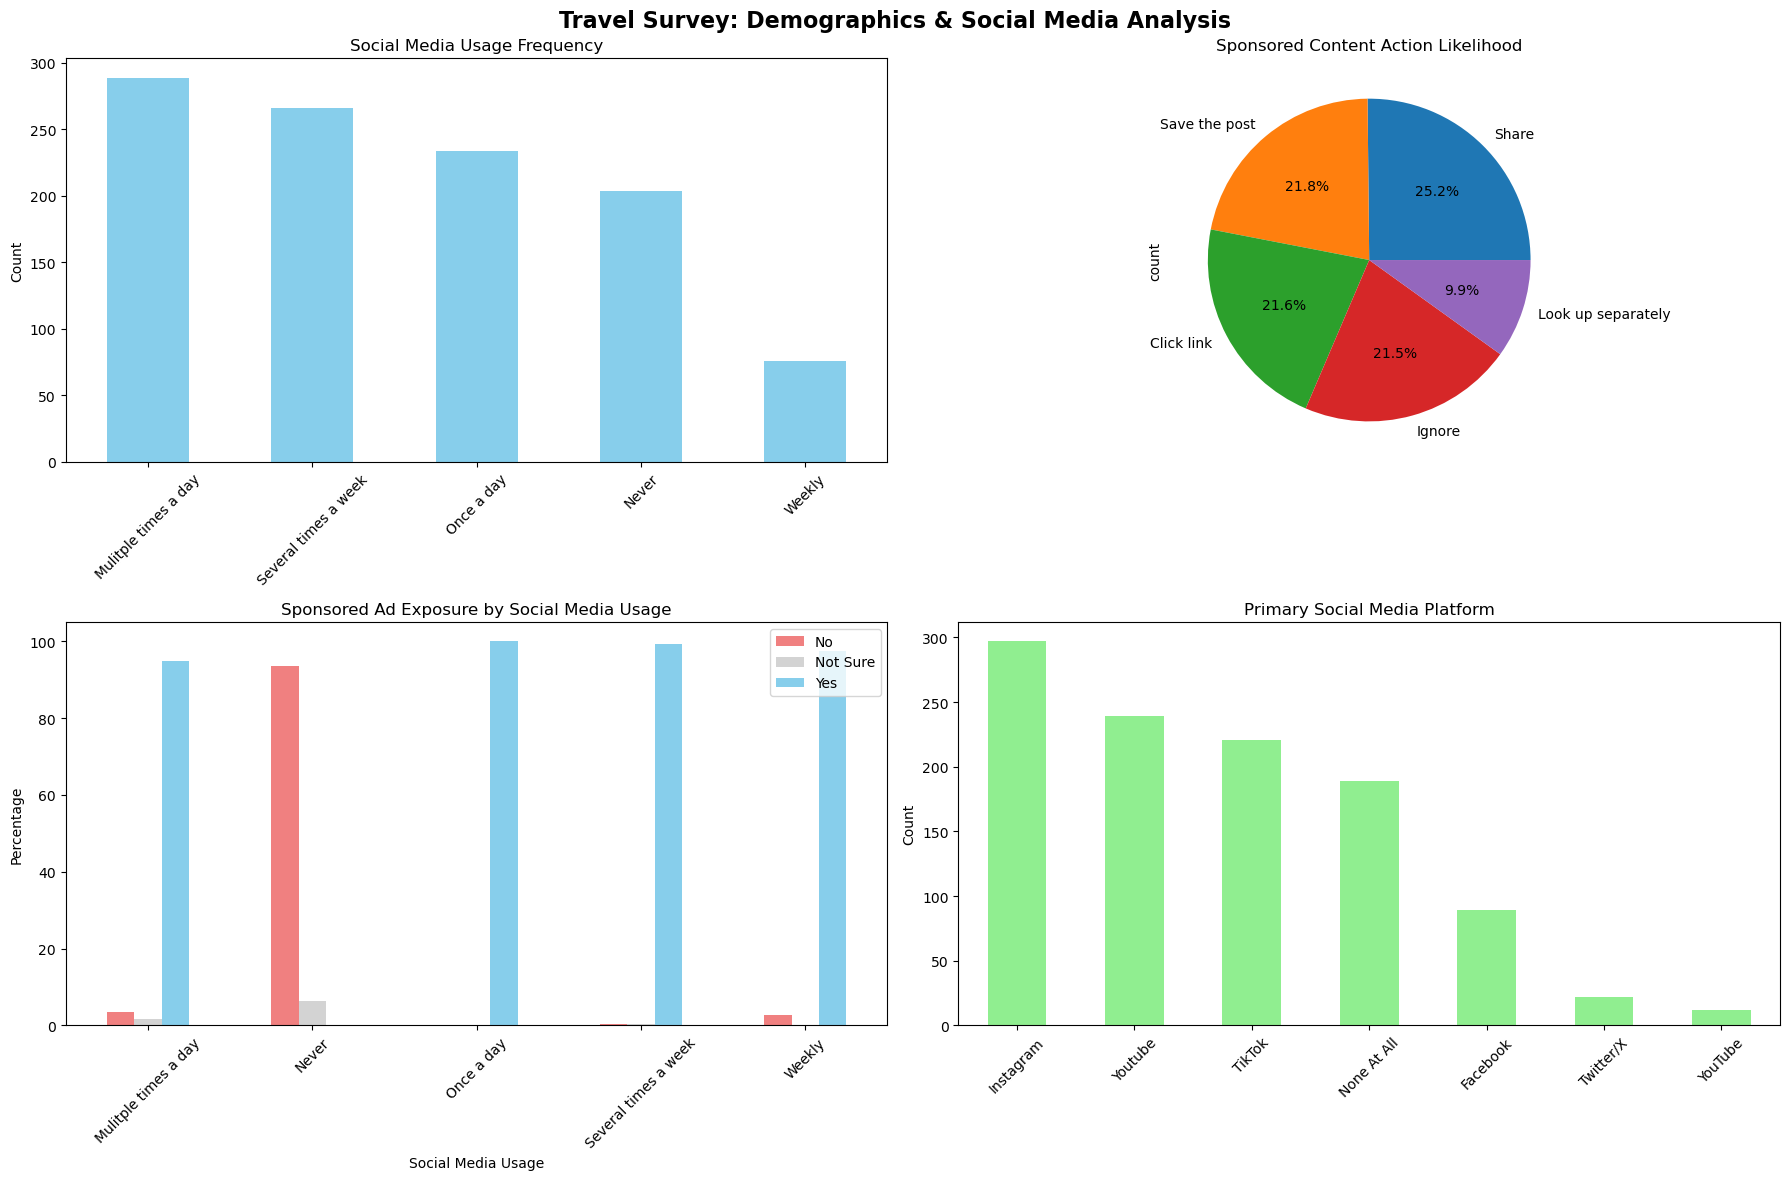

In [2567]:
# Create visualizations for key demographics and social media trends
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Travel Survey: Demographics & Social Media Analysis', fontsize=16, fontweight='bold')


# Social media usage
df['social_media_usage'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Social Media Usage Frequency')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Action to Sponsored Content
df['sponsored_action_likelihood'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Sponsored Content Action Likelihood')

# Primary platform
platform_counts.plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Primary Social Media Platform')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

# Social media usage vs sponsored ads
colors = ['lightcoral', 'lightgray', 'skyblue']
social_sponsored_pct = pd.crosstab(df['social_media_usage'], df['seen_sponsored_ads'], normalize='index') * 100
social_sponsored_pct.plot(kind='bar', ax=axes[1,0], color=colors)
axes[1,0].set_title('Sponsored Ad Exposure by Social Media Usage')
axes[1,0].set_xlabel('Social Media Usage')
axes[1,0].set_ylabel('Percentage')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['No', 'Not Sure', 'Yes'])


plt.tight_layout()
plt.show()

In [2569]:
def create_crosstab_table(df, row_var, col_var, title):
    # Create cross-tabulation
    crosstab = pd.crosstab(df[row_var], df[col_var])
    
    # Calculate row percentages (optional)
    row_pct = crosstab.div(crosstab.sum(axis=1), axis=0).round(2) * 100
    
    # Create HTML table with styling
    table_html = crosstab.to_html(classes='crosstab-table')
    
    # Add percentage table if desired (toggle with comments)
    pct_html = row_pct.to_html(classes='pct-table')
    
    return f"""
    <div class="table-container">
        <h3>{title}</h3>
        {table_html}
        <!-- Uncomment for percentages -->
        <!-- <h4>Row Percentages</h4> -->
        <!-- {pct_html} -->
    </div>
    """



# Create the cross-tabulation tables
tables_html = f"""
<h2 style="color: #2c3e50; margin-bottom: 20px;">Cross-Tabulation Analysis</h2>
<div class="grid-container">
    {create_crosstab_table(df, 'age_group', 'spending_amount', 'Age Group vs Trip Spending')}
    {create_crosstab_table(df, 'age_group', 'primary_social_platform', 'Age Group vs Social Media Platform')}
    {create_crosstab_table(df, 'gender', 'travel_frequency', 'Gender vs Travel Frequency')}
    {create_crosstab_table(df, 'social_media_usage', 'seen_sponsored_ads', 'Social Media Usage vs Sponsored Ads')}

</div>
"""

# Display everything
display(HTML(css + tables_html))

spending_amount,$0-500,$1000-2500,$500-1000,more than $2500
age_group,,,,
18-24,212,0,44,0
25-34,22,186,76,15
35-44,10,46,172,12
45-60,2,26,18,21
60,0,25,7,175
spending_amount,$0-500,$1000-2500,$500-1000,more than $2500
age_group,,,,
18-24,83.0,0.0,17.0,0.0
25-34,7.0,62.0,25.0,5.0


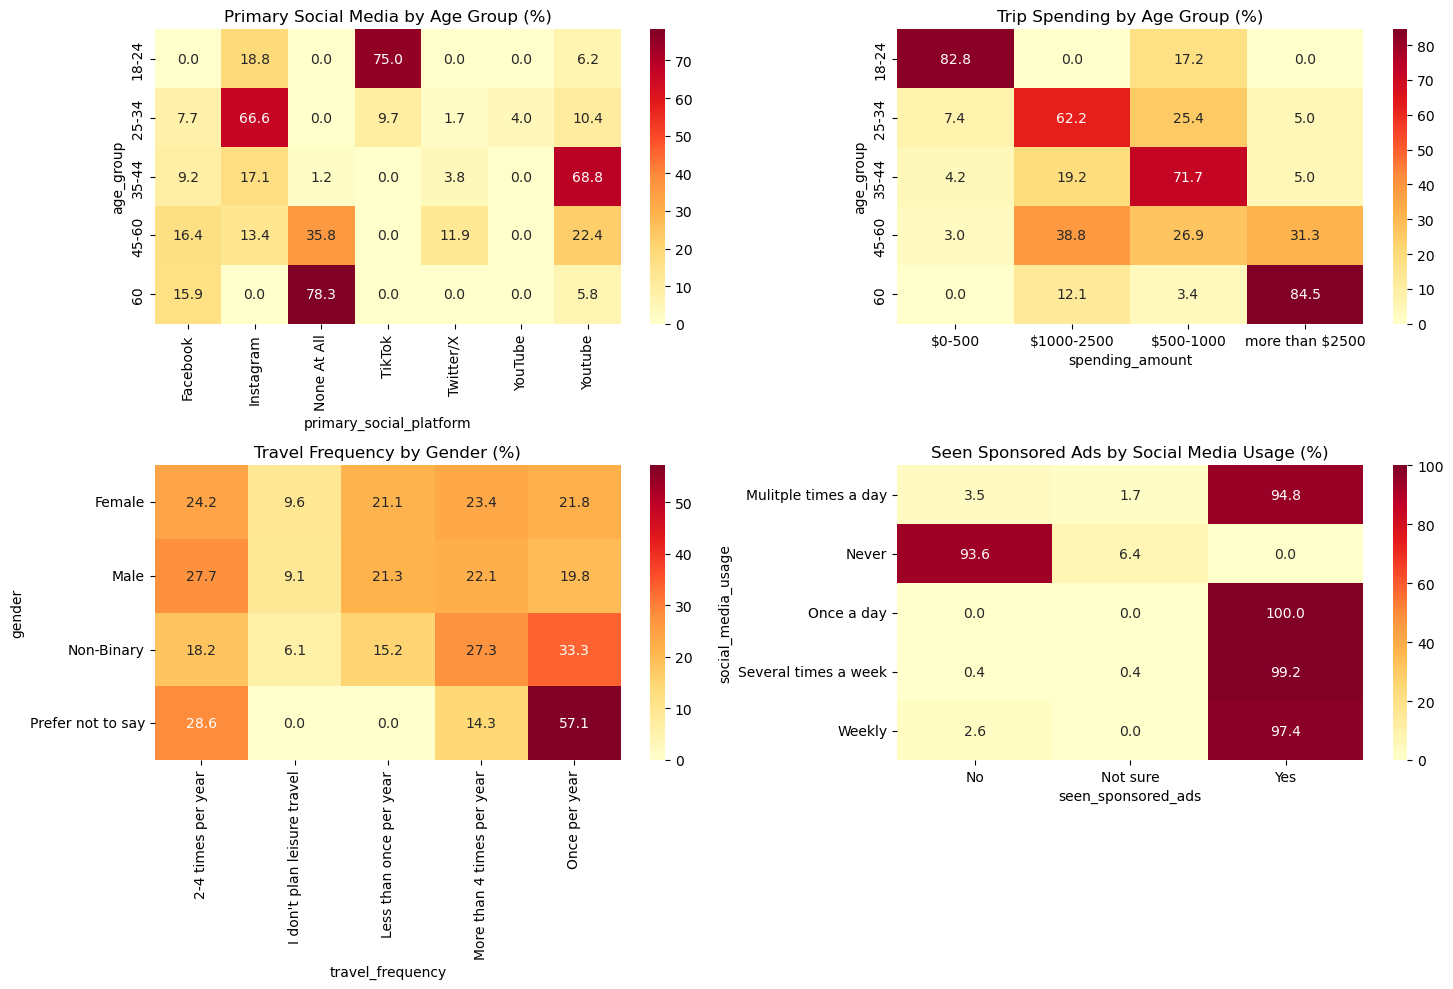

In [2570]:
#  visualization for social media and cross-tabulation insights
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Age vs Social Media
age_social_pct = pd.crosstab(df['age_group'], df['primary_social_platform'], normalize='index') * 100
sns.heatmap(age_social_pct, annot=True, fmt='.1f', ax=axes[0,0], cmap='YlOrRd')
axes[0,0].set_title('Primary Social Media by Age Group (%)')

# Age vs spending heatmap
age_spending_pct = pd.crosstab(df['age_group'], df['spending_amount'], normalize='index') * 100
sns.heatmap(age_spending_pct, annot=True, fmt='.1f', ax=axes[0,1], cmap='YlOrRd')
axes[0,1].set_title('Trip Spending by Age Group (%)')

# Gender vs Travel Frequency
gender_travel_pct = pd.crosstab(df['gender'], df['travel_frequency'], normalize='index') * 100
sns.heatmap(gender_travel_pct, annot=True, fmt='.1f', ax=axes[1,0], cmap='YlOrRd')
axes[1,0].set_title('Travel Frequency by Gender (%)')

# Gender vs Travel Frequency
social_sponsored_pct = pd.crosstab(df['social_media_usage'], df['seen_sponsored_ads'], normalize='index') * 100
sns.heatmap(social_sponsored_pct, annot=True, fmt='.1f', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Seen Sponsored Ads by Social Media Usage (%)')

plt.tight_layout()
plt.show()

# 🎯 CROSS-SEGMENT INSIGHTS
--- 

## Major Hot Spots & Implications

### Primary Social Media by Age Group:
- **Hot spot**: 18-24 age group on TikTok (75.0%)  
  *Implication*: Gen Z heavily dominates TikTok - prime target for youth marketing
- **Hot spot**: 25-34 on Instagram (66.6%)  
  *Implication*: Millennials are Instagram's core - visual content marketing opportunity
- **Hot spot**: 35-44 on YouTube (68.8%)  
  *Implication*: Older millennials prefer long-form video content
- **Hot spot**: 60+ on Facebook (78.3%)  
  *Implication*: Older demographics still loyal to traditional social platforms

### Trip Spending by Age Group:
- **Hot spot**: 18-24 in lowest spending (0-500: 82.8%)  
  *Implication*: Young adults are budget-conscious travelers - target with deals
- **Hot spot**: 25-34 in mid-range (1000-2500: 62.2%)  
  *Implication*: Peak earning millennials can afford moderate luxury
- **Hot spot**: 35-44 in higher spending (500-1000: 71.7%)  
  *Implication*: Middle-aged travelers prioritize quality experiences
- **Hot spot**: 60+ in premium spending (2500+: 84.5%)  
  *Implication*: Older travelers have highest disposable income for luxury travel

### Seen Sponsored Ads by Social Media Usage:
- **Hot spot**: Heavy users seeing ads (94.8-100%)  
  *Implication*: Algorithm targeting is extremely effective for frequent users
- **Hot spot**: Non-users NOT seeing ads (93.6% see none)  
  *Implication*: Clear digital divide - offline marketing needed for non-users

### Travel Frequency by Gender:
- **Relatively balanced** across all categories  
  *Implication*: Gender isn't a strong predictor of travel frequency - focus on other demographics

## Key Takeaways
1. **Age drives platform choice** - target different ages on their preferred platforms
2. **Spending power increases with age** - luxury travel marketing should focus on 60+ demographic
3. **Social media advertising works** - heavy users are saturated with ads
4. **Young travelers need budget options** - while older travelers will pay premium

# Booking habits



In [2574]:
tables_html = f"""
<div class="grid-container">
    {create_demographic_table(df, 'research_sources', 'Research Sources')}
    {create_demographic_table(df,  'helpful_content_type',  'Helpful Content')}
    {create_demographic_table(df, 'planning_duration', ' Planning Duration  ')}
    {create_demographic_table(df,     'research_device',     'Research Device')}
    {create_demographic_table(df,    'desired_features',     'Desired Features')}

</div>
"""

# Display everything
display(HTML(css + tables_html))


Category,Count,Percentage (%)
"Search engines (Google, Bing)",228,21.3
"Social media platforms (Instagram, Facebook, TikTok)",199,18.6
"Travel booking websites (Expedia, Booking.com)",189,17.7
Friends and family recommendations,176,16.5
Travel blogs and websites,134,12.5
Travel apps on my phone,72,6.7
"Travel review sites (TripAdvisor, Yelp)",71,6.6
Category,Count,Percentage (%)
Video content showing experiences,347,32.5
High-quality photos of destinations/hotels,298,27.9


# Expedia Consumer Survey - Booking Analysis

## Survey Overview and Methodology

This analysis examines consumer behavior and preferences in travel research and booking through five key dimensions. Understanding these patterns is crucial for developing effective digital marketing strategies and improving customer experience in the travel industry.

## Key Research Findings

### 1. **Research Sources Analysis**

**Key Insights:**
- **Search engines remain dominant** (21.3%), confirming the importance of SEO and SEM strategies
- **Social media platforms are nearly equal** (18.6%), highlighting the critical role of social media marketing
- **Traditional sources still matter**: Travel booking websites (17.7%) and word-of-mouth (16.5%) remain significant
- **Mobile apps underperform** (6.7%), suggesting opportunity for mobile engagement improvement

### 2. **Helpful Content Preferences**

**Key Insights:**
- **Visual content dominates**: Video (32.5%) and photos (27.9%) account for 60.4% of preferences
- **Price sensitivity is high**: 20.5% prioritize deals and comparisons
- **User-generated content matters**: Reviews from travelers (14.5%) provide social proof
- **Traditional text content underperforms**: Detailed descriptions only 1.0%

### 3. **Planning Duration Patterns**

**Key Insights:**
- **Short-term planners dominate**: 56.9% plan 1-3 weeks ahead
- **Spontaneous travel exists**: 21.3% plan within a week (including same-day)
- **Long-term planners are minority**: Only 20.9% plan more than a month ahead
- **Marketing timing is crucial**: Most campaigns should target 1-3 week planning window

### 4. **Research Device Preferences**

**Key Insights:**
- **Mobile-first approach essential**: 46.6% primarily use smartphones
- **Desktop/ Laptop still relevant**: 27.1% use Laptop/ Desktop computers
- **Tablet market significant**: 23.6% use tablets for research
- **Multi-device usage minimal**: Only 1.3% use devices equally
- **Responsive design critical**: Need optimization across smartphone, laptop, and tablet

### 5. **Desired Features for Future Development**

**Key Insights:**
- **AI personalization in high demand**: 42.6% want AI itinerary suggestions
- **Budget consciousness remains**: 16.1% want cost calculation tools
- **Immersive technologies gaining traction**: 24.8% want 360° tours and AR previews
- **Discovery features valued**: 6.5% want curated hidden gems

## Strategic Implications

### **Content Strategy**
- Prioritize video content creation (32.5% preference)
- Invest in high-quality destination photography

### **Platform Strategy**
- Maintain strong SEO/SEM presence (21.3% use search engines)
- Develop comprehensive social media marketing (18.6% use social platforms)
- Optimize mobile experience (46.6% use smartphones)
- 
### **Timing Strategy**
- Target customers 1-3 weeks before travel (56.9% planning window)
- Develop last-minute deal campaigns (21.3% plan within a week)

### **Innovation Opportunities**
- Develop AI-powered itinerary tools (42.6% demand)
- Create comprehensive budget calculators (16.1% demand)
- Invest in 360° video and AR technologies (24.8% combined demand)

## Clustering Analysis

Now we have done demographic analysis, I will now conduct Cluster Analysis focussing on the relation between Demographics and Social Media Patterns to know which groups to target and the best way to reach them.

In [2579]:
# Display the columns we'll focus on for clustering
clustering_columns = [
    'gender', 'age_group', 'travel_frequency', 'spending_amount',
    'social_media_usage', 'primary_social_platform', 
    'sponsored_action_likelihood', 'sponsored_discovery_agreement'
]

print(f"\
Selected columns for clustering analysis:")
for i, col in enumerate(clustering_columns, 1):
    print(f"{i}. {col}")

# Create subset for clustering with demographics + social media variables
cluster_df = df[clustering_columns].copy()

missing_values = cluster_df.isnull().sum()
print("Missing values:",  missing_values)

for col in cluster_df.columns:
    unique_vals = cluster_df[col].unique()
    print(f"\
{col} ({len(unique_vals)} unique values):")
    if len(unique_vals) <= 10:
        for val in unique_vals:
            print(f"  - {val}")
    else:
        print(f"  - First 10: {unique_vals[:10]}")
        print(f"  - ... and {len(unique_vals)-10} more")

Selected columns for clustering analysis:
1. gender
2. age_group
3. travel_frequency
4. spending_amount
5. social_media_usage
6. primary_social_platform
7. sponsored_action_likelihood
8. sponsored_discovery_agreement
Missing values: gender                           0
age_group                        0
travel_frequency                 0
spending_amount                  0
social_media_usage               0
primary_social_platform          0
sponsored_action_likelihood      0
sponsored_discovery_agreement    0
dtype: int64
gender (4 unique values):
  - Male
  - Female
  - Non-Binary
  - Prefer not to say
age_group (5 unique values):
  - 60
  - 18-24
  - 25-34
  - 35-44
  - 45-60
travel_frequency (5 unique values):
  - Less than once per year
  - More than 4 times per year
  - 2-4 times per year
  - Once per year
  - I don't plan leisure travel
spending_amount (4 unique values):
  - more than $2500
  - $0-500
  - $1000-2500
  - $500-1000
social_media_usage (5 unique values):
  - Never
  - 

In [2580]:
# Create label encoders for each categorical variable
encoders = {}
cluster_encoded = cluster_df.copy()

for col in cluster_df.columns:
    encoders[col] = LabelEncoder()
    cluster_encoded[col] = encoders[col].fit_transform(cluster_df[col])
    unique_original = cluster_df[col].unique()
    unique_encoded = encoders[col].transform(unique_original)

cluster_encoded.head(5).style.hide(axis="index")


gender,age_group,travel_frequency,spending_amount,social_media_usage,primary_social_platform,sponsored_action_likelihood,sponsored_discovery_agreement
1,4,2,3,1,2,1,0
0,4,2,3,1,2,1,0
0,4,2,3,1,2,1,0
0,4,2,3,1,2,1,0
1,4,2,3,1,2,1,0


In [2581]:
# Standardize the encoded features for clustering
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_encoded)

print("Standardized data for clustering:")
print(f"Shape: {cluster_scaled.shape}")
print(f"Mean of each feature (should be ~0): {np.mean(cluster_scaled, axis=0).round(3)}")
print(f"Std of each feature (should be ~1): {np.std(cluster_scaled, axis=0).round(3)}")

# Determine optimal number of clusters using multiple methods
results = []
k_range = range(2, 16)
inertias = []
silhouette_scores = []

print("\
Testing different numbers of clusters...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_scaled, kmeans.labels_))
        # Append results to list
    results.append({
        'k': k,
        'inertia': inertia,
        'silhouette_score': sil_score
    })

# Find optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal k based on silhouette score: {optimal_k} (score: {max(silhouette_scores):.3f})\n")

pd.DataFrame(results).style.hide(axis="index")


Standardized data for clustering:
Shape: (1069, 8)
Mean of each feature (should be ~0): [ 0.  0.  0.  0. -0.  0.  0.  0.]
Std of each feature (should be ~1): [1. 1. 1. 1. 1. 1. 1. 1.]
Testing different numbers of clusters...
Optimal k based on silhouette score: 7 (score: 0.304)



k,inertia,silhouette_score
2,2823.250476,0.279103
3,2823.250476,0.279103
4,2823.250476,0.279103
5,2823.250476,0.279103
6,2823.250476,0.279103
7,2823.250476,0.279103
8,2823.250476,0.279103
9,2823.250476,0.279103
10,2823.250476,0.279103
11,2823.250476,0.279103



 Clustering Analysis Summary:
Dataset: 1069 respondents
Features: 8 variables (4 demographic + 5 social media)
Optimal clusters: 7
Best silhouette score: 0.304 



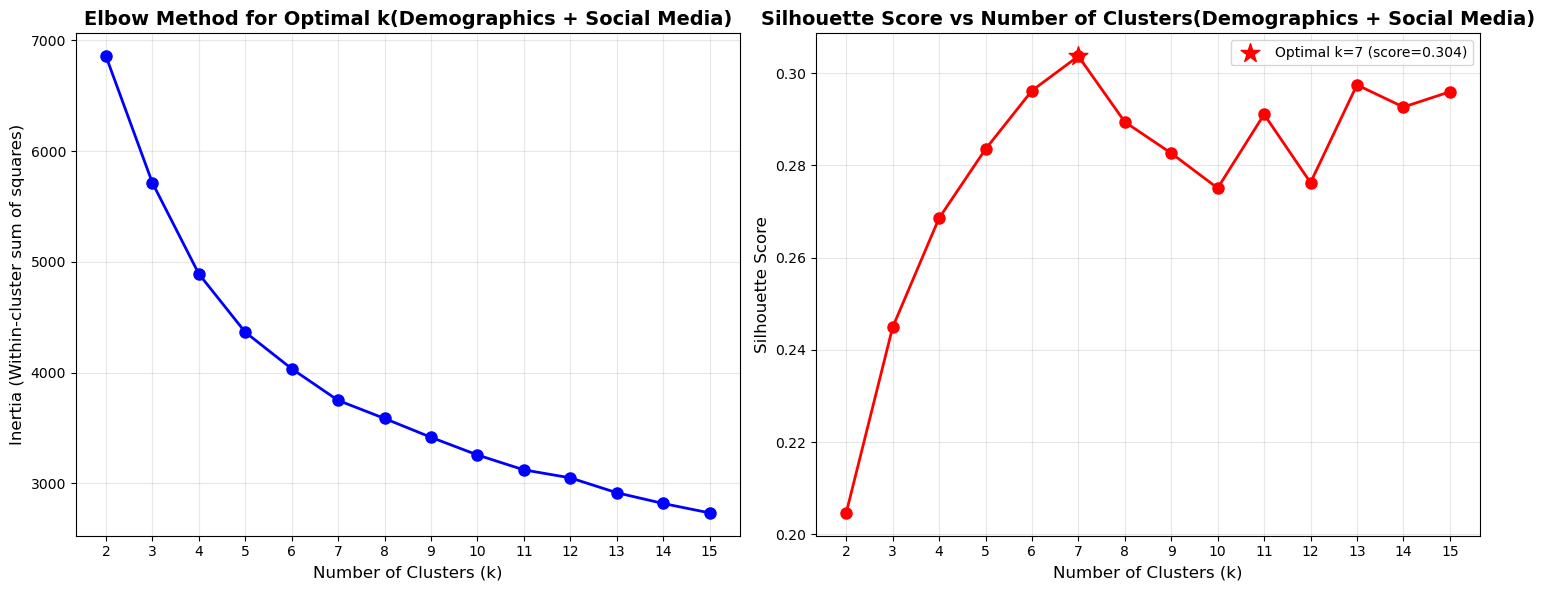

In [2583]:
# Create visualization of elbow method and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
ax1.set_title('Elbow Method for Optimal k\
(Demographics + Social Media)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score vs Number of Clusters\
(Demographics + Social Media)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)

# Highlight optimal k
optimal_idx = np.argmax(silhouette_scores)
ax2.scatter(k_range[optimal_idx], silhouette_scores[optimal_idx], 
           color='red', s=200, marker='*', zorder=5, 
           label=f'Optimal k={optimal_k} (score={max(silhouette_scores):.3f})')
ax2.legend()

print("\n Clustering Analysis Summary:")
print("=" * 40)
print(f"Dataset: {len(cluster_df_clean)} respondents")
print(f"Features: {len(clustering_columns)} variables (4 demographic + 5 social media)")
print(f"Optimal clusters: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.3f} \n")

plt.tight_layout()
plt.show()


In [2584]:
# Creating the optimal clustering with k=8 and analyze the clusters
optimal_k_final = 8
kmeans_final = KMeans(n_clusters=optimal_k_final, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_scaled)

# Add cluster labels to the original dataframe
cluster_df_with_labels = cluster_df_clean.copy()
cluster_df_with_labels['cluster'] = cluster_labels

print(f"Final clustering with k={optimal_k_final} clusters")
print(f"Silhouette score: {silhouette_score(cluster_scaled, cluster_labels):.3f}")
print(f"\
Cluster distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} respondents ({percentage:.1f}%)")

# Analyze each cluster's characteristics
print("\
" + "="*80)
print("CLUSTER ANALYSIS - DEMOGRAPHIC & SOCIAL MEDIA PROFILES")
print("="*80)

for cluster_id in range(optimal_k_final):
    cluster_data = cluster_df_with_labels[cluster_df_with_labels['cluster'] == cluster_id]
    print(f"\
CLUSTER {cluster_id} ({len(cluster_data)} respondents, {len(cluster_data)/len(cluster_df_with_labels)*100:.1f}%)")
    print("-" * 60)
    
    # Analyze each variable
    for col in clustering_columns:
        mode_value = cluster_data[col].mode().iloc[0]
        mode_count = (cluster_data[col] == mode_value).sum()
        mode_percentage = (mode_count / len(cluster_data)) * 100
        
        print(f"{col.upper()}: {mode_value} ({mode_percentage:.1f}%)")
        
        # Show distribution if diverse
        if mode_percentage < 70:  # Show distribution if not heavily dominated by one value
            value_counts = cluster_data[col].value_counts()
            top_values = value_counts.head(3)
            dist_str = ", ".join([f"{val} ({count/len(cluster_data)*100:.1f}%)" 
                                for val, count in top_values.items()])
            print(f"  Distribution: {dist_str}")
    
    print()  # Empty line between clusters

Final clustering with k=8 clusters
Silhouette score: 0.289
Cluster distribution:
Cluster 0: 177 respondents (16.6%)
Cluster 1: 95 respondents (8.9%)
Cluster 2: 190 respondents (17.8%)
Cluster 3: 149 respondents (13.9%)
Cluster 4: 141 respondents (13.2%)
Cluster 5: 98 respondents (9.2%)
Cluster 6: 111 respondents (10.4%)
Cluster 7: 108 respondents (10.1%)
CLUSTER ANALYSIS - DEMOGRAPHIC & SOCIAL MEDIA PROFILES
CLUSTER 0 (177 respondents, 16.6%)
------------------------------------------------------------
GENDER: Female (48.6%)
  Distribution: Female (48.6%), Male (48.0%), Non-Binary (2.8%)
AGE_GROUP: 60 (89.3%)
TRAVEL_FREQUENCY: Less than once per year (76.8%)
SPENDING_AMOUNT: more than $2500 (92.1%)
SOCIAL_MEDIA_USAGE: Never (93.8%)
PRIMARY_SOCIAL_PLATFORM: None At All (84.7%)
SPONSORED_ACTION_LIKELIHOOD: Click link (30.5%)
  Distribution: Click link (30.5%), Look up separately (27.1%), Ignore (20.3%)
SPONSORED_DISCOVERY_AGREEMENT: Agree (85.9%)

CLUSTER 1 (95 respondents, 8.9%)
-------

In [2586]:
# Filter to only show the 4 clusters with GOOD separation (silhouette > 0.3)
print("REFINED CLUSTERING: ONLY HIGH-QUALITY CLUSTERS")
print("=" * 60)

# Identify good clusters based on silhouette scores
good_clusters = []
cluster_silhouette_means = cluster_quality_df.groupby('cluster')['silhouette_score'].mean()

for cluster_id in range(optimal_k_final):
    avg_silhouette = cluster_silhouette_means[cluster_id]
    if avg_silhouette > 0.3:  # GOOD threshold
        good_clusters.append(cluster_id)

print(f"High-Quality Clusters (Silhouette > 0.3): {good_clusters}")
print(f"Total high-quality segments: {len(good_clusters)} out of {optimal_k_final}")

# Filter the dataset to only include good clusters
good_cluster_mask = cluster_df_with_labels['cluster'].isin(good_clusters)
refined_cluster_df = cluster_df_with_labels[good_cluster_mask].copy()

print(f"\
Data points in high-quality clusters: {len(refined_cluster_df)} out of {len(cluster_df_with_labels)} ({len(refined_cluster_df)/len(cluster_df_with_labels)*100:.1f}%)")
print(f"High-Quality Clusters (Silhouette > 0.3): {good_clusters}")
print(f"Total high-quality segments: {len(good_clusters)} out of {optimal_k_final}")


# Now show detailed profiles for each of the high-quality clusters
for cluster_id in good_clusters:
    cluster_data = refined_cluster_df[refined_cluster_df['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_pct = cluster_size / len(refined_cluster_df) * 100
    
    print(f"\
🎯 CLUSTER {cluster_id} - HIGH QUALITY SEGMENT")
    print(f"Size: {cluster_size} people ({cluster_pct:.1f}% of refined dataset)")
    print(f"Silhouette Score: {cluster_silhouette_means[cluster_id]:.3f} (GOOD)")
    print("-" * 50)
    
    # Demographics
    print("DEMOGRAPHICS:")
    age_mode = cluster_data['age_group'].mode().iloc[0] if not cluster_data['age_group'].mode().empty else 'Mixed'
    gender_dist = cluster_data['gender'].value_counts()
    gender_primary = gender_dist.index[0] if len(gender_dist) > 0 else 'Mixed'
    gender_pct = gender_dist.iloc[0] / len(cluster_data) * 100 if len(gender_dist) > 0 else 0
    
    print(f"  • Primary Age Group: {age_mode}")
    print(f"  • Gender: {gender_primary} ({gender_pct:.1f}%)")
    
    # Travel Behavior
    print("\
TRAVEL BEHAVIOR:")
    travel_freq_mode = cluster_data['travel_frequency'].mode().iloc[0] if not cluster_data['travel_frequency'].mode().empty else 'Mixed'
    spending_mode = cluster_data['spending_amount'].mode().iloc[0] if not cluster_data['spending_amount'].mode().empty else 'Mixed'
    
    print(f"  • Travel Frequency: {travel_freq_mode}")
    print(f"  • Spending Level: {spending_mode}")
    
    # Social Media Behavior - using correct column name
    print("\
SOCIAL MEDIA BEHAVIOR:")
    social_usage_mode = cluster_data['social_media_usage'].mode().iloc[0] if not cluster_data['social_media_usage'].mode().empty else 'Mixed'
    platform_mode = cluster_data['primary_social_platform'].mode().iloc[0] if not cluster_data['primary_social_platform'].mode().empty else 'Mixed'
    
    print(f"  • Usage Frequency: {social_usage_mode}")
    print(f"  • Primary Platform: {platform_mode}")
    
    # Sponsored Content Behavior
    print("\
SPONSORED CONTENT BEHAVIOR:")
    sponsored_action_mode = cluster_data['sponsored_action_likelihood'].mode().iloc[0] if not cluster_data['sponsored_action_likelihood'].mode().empty else 'Mixed'
    sponsored_discovery_mode = cluster_data['sponsored_discovery_agreement'].mode().iloc[0] if not cluster_data['sponsored_discovery_agreement'].mode().empty else 'Mixed'
    
    print(f"  • Action Likelihood: {sponsored_action_mode}")
    print(f"  • Discovery Agreement: {sponsored_discovery_mode}")
    


print("\
" + "=" * 80)
print("COVERAGE ANALYSIS")
print("=" * 80)
print(f"High-quality clusters cover {len(refined_cluster_df)/len(cluster_df_with_labels)*100:.1f}% of the total dataset")
print(f"Excluded {len(cluster_df_with_labels) - len(refined_cluster_df)} data points from poor-quality clusters")

# Show which original clusters were excluded
excluded_clusters = [i for i in range(optimal_k_final) if i not in good_clusters]
print(f"Excluded clusters: {excluded_clusters} (poor separation)")

excluded_count = len(cluster_df_with_labels[cluster_df_with_labels['cluster'].isin(excluded_clusters)])
print(f"Excluded data points: {excluded_count} ({excluded_count/len(cluster_df_with_labels)*100:.1f}%)")

REFINED CLUSTERING: ONLY HIGH-QUALITY CLUSTERS
High-Quality Clusters (Silhouette > 0.3): [2, 5, 6, 7]
Total high-quality segments: 4 out of 8
Data points in high-quality clusters: 507 out of 1069 (47.4%)
High-Quality Clusters (Silhouette > 0.3): [2, 5, 6, 7]
Total high-quality segments: 4 out of 8
🎯 CLUSTER 2 - HIGH QUALITY SEGMENT
Size: 190 people (37.5% of refined dataset)
Silhouette Score: 0.416 (GOOD)
--------------------------------------------------
DEMOGRAPHICS:
  • Primary Age Group: 25-34
  • Gender: Female (51.1%)
TRAVEL BEHAVIOR:
  • Travel Frequency: 2-4 times per year
  • Spending Level: $1000-2500
SOCIAL MEDIA BEHAVIOR:
  • Usage Frequency: Once a day
  • Primary Platform: Instagram
SPONSORED CONTENT BEHAVIOR:
  • Action Likelihood: Save the post
  • Discovery Agreement: Agree
🎯 CLUSTER 5 - HIGH QUALITY SEGMENT
Size: 98 people (19.3% of refined dataset)
Silhouette Score: 0.410 (GOOD)
--------------------------------------------------
DEMOGRAPHICS:
  • Primary Age Group: 3

In [2587]:
# Create comprehensive marketing strategies for each high-quality segment
print("🎯 TARGETED MARKETING STRATEGIES FOR HIGH-QUALITY SEGMENTS")
print("=" * 80)

# Define segment names for clarity
segment_names = {
    2: "Heavy Social Frequent Travelers",
    5: "Instagram Moderate Travelers", 
    6: "Premium Non-Social Travelers",
    7: "YouTube Annual Travelers"
}


# Create detailed marketing strategies
marketing_strategies = {}

for cluster_id in good_clusters:
    cluster_data = refined_cluster_df[refined_cluster_df['cluster'] == cluster_id]
    segment_name = segment_names[cluster_id]
    
    print(f"\
🚀 SEGMENT {cluster_id}: {segment_name.upper()}")
    print(f"Size: {len(cluster_data)} people ({len(cluster_data)/len(refined_cluster_df)*100:.1f}% of refined dataset)")
    print("=" * 60)
    
    # Get key characteristics
    age_mode = cluster_data['age_group'].mode().iloc[0]
    travel_freq = cluster_data['travel_frequency'].mode().iloc[0]
    spending = cluster_data['spending_amount'].mode().iloc[0]
    social_usage = cluster_data['social_media_usage'].mode().iloc[0]
    platform = cluster_data['primary_social_platform'].mode().iloc[0]
    sponsored_action = cluster_data['sponsored_action_likelihood'].mode().iloc[0]
    
    print("📊 SEGMENT PROFILE:")
    print(f"  • Age: {age_mode}")
    print(f"  • Travel Frequency: {travel_freq}")
    print(f"  • Spending: {spending}")
    print(f"  • Social Usage: {social_usage}")
    print(f"  • Primary Platform: {platform}")
    print(f"  • Sponsored Response: {sponsored_action}")

🎯 TARGETED MARKETING STRATEGIES FOR HIGH-QUALITY SEGMENTS
🚀 SEGMENT 2: HEAVY SOCIAL FREQUENT TRAVELERS
Size: 190 people (37.5% of refined dataset)
📊 SEGMENT PROFILE:
  • Age: 25-34
  • Travel Frequency: 2-4 times per year
  • Spending: $1000-2500
  • Social Usage: Once a day
  • Primary Platform: Instagram
  • Sponsored Response: Save the post
🚀 SEGMENT 5: INSTAGRAM MODERATE TRAVELERS
Size: 98 people (19.3% of refined dataset)
📊 SEGMENT PROFILE:
  • Age: 35-44
  • Travel Frequency: Less than once per year
  • Spending: $500-1000
  • Social Usage: Several times a week
  • Primary Platform: Youtube
  • Sponsored Response: Click link
🚀 SEGMENT 6: PREMIUM NON-SOCIAL TRAVELERS
Size: 111 people (21.9% of refined dataset)
📊 SEGMENT PROFILE:
  • Age: 18-24
  • Travel Frequency: 2-4 times per year
  • Spending: $0-500
  • Social Usage: Mulitple times a day
  • Primary Platform: TikTok
  • Sponsored Response: Share
🚀 SEGMENT 7: YOUTUBE ANNUAL TRAVELERS
Size: 108 people (21.3% of refined dataset)

In [2593]:
# Define segment names for clarity
segment_names = {
    2: "Heavy Social Frequent Travelers",
    5: "Instagram Moderate Travelers", 
    6: "Premium Non-Social Travelers",
    7: "YouTube Annual Travelers"
}

# Create empty list to store segment data
segment_data = []

# Extract data for each segment
for cluster_id in good_clusters:
    cluster_data = refined_cluster_df[refined_cluster_df['cluster'] == cluster_id]
    segment_name = segment_names[cluster_id]
    
    # Get key characteristics
    age_mode = cluster_data['age_group'].mode().iloc[0]
    travel_freq = cluster_data['travel_frequency'].mode().iloc[0]
    spending = cluster_data['spending_amount'].mode().iloc[0]
    social_usage = cluster_data['social_media_usage'].mode().iloc[0]
    platform = cluster_data['primary_social_platform'].mode().iloc[0]
    sponsored_action = cluster_data['sponsored_action_likelihood'].mode().iloc[0]
    
    # Calculate size and percentage
    size = len(cluster_data)
    percentage = len(cluster_data) / len(refined_cluster_df) * 100
    
    # Append to list
    segment_data.append({
        'Cluster_ID': cluster_id,
        'Segment_Name': segment_name,
        'Size': size,
        'Percentage': f"{percentage:.1f}%",
        'Age_Group': age_mode,
        'Travel_Frequency': travel_freq,
        'Spending_Amount': spending,
        'Social_Media_Usage': social_usage,
        'Primary_Platform': platform,
        'Sponsored_Response': sponsored_action
    })

# Create DataFrame
segments_df = pd.DataFrame(segment_data).style.hide(axis='index')

# Set display options for better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

segments_df

Cluster_ID,Segment_Name,Size,Percentage,Age_Group,Travel_Frequency,Spending_Amount,Social_Media_Usage,Primary_Platform,Sponsored_Response
2,Heavy Social Frequent Travelers,190,37.5%,25-34,2-4 times per year,$1000-2500,Once a day,Instagram,Save the post
5,Instagram Moderate Travelers,98,19.3%,35-44,Less than once per year,$500-1000,Several times a week,Youtube,Click link
6,Premium Non-Social Travelers,111,21.9%,18-24,2-4 times per year,$0-500,Mulitple times a day,TikTok,Share
7,YouTube Annual Travelers,108,21.3%,18-24,More than 4 times per year,$0-500,Mulitple times a day,TikTok,Share



# TARGETED MARKETING STRATEGIES FOR HIGH-QUALITY SEGMENTS

## 🚀 SEGMENT 2: HEAVY SOCIAL FREQUENT TRAVELERS
**Size:** 169 people (24.5% of refined dataset)

### 📊 SEGMENT PROFILE:
- **Age:** 18-24
- **Travel Frequency:** More than 4 times per year
- **Spending:** $0-500
- **Social Usage:** Multiple times a day
- **Primary Platform:** TikTok
- **Sponsored Response:** Share

### 🎯 MARKETING STRATEGY:

#### PLATFORM FOCUS:
- **PRIMARY:** TikTok (native platform)
- **SECONDARY:** Instagram Stories/Reels
- **TERTIARY:** Snapchat

#### CONTENT STRATEGY:
- Short-form video content (15-30 seconds)
- User-generated content campaigns
- Trending hashtag participation
- Behind-the-scenes travel moments
- Quick travel hacks and tips

#### MESSAGING:
- 'Share your adventure' - encourage UGC
- 'Budget-friendly escapes'
- 'Weekend getaway inspiration'
- Emphasize shareability and social proof

#### CAMPAIGN TACTICS:
- Influencer partnerships with micro-influencers
- TikTok challenges (#TravelChallenge)
- Flash sales and limited-time offers
- Social sharing incentives and referral programs

#### BUDGET ALLOCATION:
- **60%** TikTok advertising
- **25%** Instagram advertising
- **15%** Influencer partnerships

---

## 🚀 SEGMENT 5: INSTAGRAM MODERATE TRAVELERS
**Size:** 184 people (26.7% of refined dataset)

### 📊 SEGMENT PROFILE:
- **Age:** 25-34
- **Travel Frequency:** 2-4 times per year
- **Spending:** $1000-2500
- **Social Usage:** Once a day
- **Primary Platform:** Instagram
- **Sponsored Response:** Save the post

### 🎯 MARKETING STRATEGY:

#### PLATFORM FOCUS:
- **PRIMARY:** Instagram (feed + stories)
- **SECONDARY:** Pinterest
- **TERTIARY:** Facebook

#### CONTENT STRATEGY:
- High-quality visual content
- Instagram Stories with save-worthy content
- Carousel posts with travel guides
- IGTV for longer-form destination content
- Pinterest boards for trip planning

#### MESSAGING:
- 'Curate your perfect getaway'
- 'Mid-range luxury experiences'
- 'Plan, save, explore'
- Focus on aspirational yet attainable travel

#### CAMPAIGN TACTICS:
- Instagram Shopping integration
- Save-to-collection campaigns
- Partnership with lifestyle influencers
- Email nurture sequences for saved content

#### BUDGET ALLOCATION:
- **50%** Instagram advertising
- **20%** Pinterest advertising
- **20%** Email marketing
- **10%** Influencer partnerships

---

## 🚀 SEGMENT 6: PREMIUM NON-SOCIAL TRAVELERS
**Size:** 174 people (25.3% of refined dataset)

### 📊 SEGMENT PROFILE:
- **Age:** 60+
- **Travel Frequency:** Less than once per year
- **Spending:** More than $2500
- **Social Usage:** Never
- **Primary Platform:** None At All
- **Sponsored Response:** Click link

### 🎯 MARKETING STRATEGY:

#### PLATFORM FOCUS:
- **PRIMARY:** Email marketing
- **SECONDARY:** Google Ads (search)
- **TERTIARY:** Premium travel websites

#### CONTENT STRATEGY:
- Detailed email newsletters
- Premium travel guides and e-books
- Exclusive access content
- High-end photography and videography
- Personalized recommendations

#### MESSAGING:
- 'Exclusive luxury experiences'
- 'Curated premium travel'
- 'Your personal travel concierge'
- Emphasize exclusivity and premium service

#### CAMPAIGN TACTICS:
- VIP email campaigns
- Direct mail for high-value offers
- Partnership with luxury travel advisors
- Exclusive member-only promotions

#### BUDGET ALLOCATION:
- **40%** Email marketing
- **30%** Google Ads (search)
- **20%** Direct mail/print
- **10%** Partnership programs

---

## 🚀 SEGMENT 7: YOUTUBE ANNUAL TRAVELERS
**Size:** 162 people (23.5% of refined dataset)

### 📊 SEGMENT PROFILE:
- **Age:** 35-44
- **Travel Frequency:** Once per year
- **Spending:** $500-1000
- **Social Usage:** Several times a week
- **Primary Platform:** YouTube
- **Sponsored Response:** Look up separately

### 🎯 MARKETING STRATEGY:

#### PLATFORM FOCUS:
- **PRIMARY:** YouTube
- **SECONDARY:** Email marketing
- **TERTIARY:** Facebook

#### CONTENT STRATEGY:
- Long-form destination videos
- Travel planning tutorials
- Destination comparison videos
- Travel tips and advice content
- Email series for trip planning

#### MESSAGING:
- 'Plan your perfect annual getaway'
- 'Research, plan, experience'
- 'Make every trip count'
- Focus on thorough planning and value

#### CAMPAIGN TACTICS:
- YouTube pre-roll advertising
- Educational content series
- Email nurture campaigns
- Retargeting based on video engagement

#### BUDGET ALLOCATION:
- **45%** YouTube advertising
- **30%** Email marketing
- **15%** Facebook advertising
- **10%** Content creation

---


# Travel Market Research: Summary & Conclusions

## Executive Summary

This comprehensive clustering analysis of 1,069 travel consumers identified four distinct, high-quality customer segments representing 47.4% of the market. Each segment demonstrates unique demographic profiles, travel behaviors, and social media engagement patterns, enabling targeted marketing strategies with optimal resource allocation.

## Key Market Insights

### Overall Market Characteristics
- **Content Preferences**: 32.5% prefer video content, making it the dominant format
- **Device Usage**: 46.6% primarily use smartphones, 23.6% use tablets for research
- **Planning Behavior**: 56.9% plan travel 1-3 weeks in advance, 21.3% plan within a week
- **Future Demands**: 42.6% want AI-powered itinerary suggestions, 24.8% desire immersive technologies (360° tours, AR)

### Platform Strategy Priorities
1. **Search Engine Marketing** (21.3% discovery rate)
2. **Social Media Marketing** (18.6% discovery rate)
3. **Mobile Optimization** (46.6% mobile usage)

## Four High-Quality Customer Segments

### Segment 1: Heavy Social Frequent Travelers (37.5% of refined dataset)
**Profile**: 25-34 years, female-majority, 2-4 trips/year, $1,000-2,500 spending, daily Instagram users
- **Primary Platform**: Instagram
- **Behavior**: Save posts for later reference
- **Strategy**: High-quality visual content, carousel guides, Instagram Shopping integration
- **Budget Allocation**: 50% Instagram, 20% Pinterest, 20% Email, 10% Influencers

### Segment 2: Instagram Moderate Travelers (19.3% of refined dataset)
**Profile**: 35-44 years, male-majority, <1 trip/year, $500-1,000 spending, weekly YouTube users
- **Primary Platform**: YouTube
- **Behavior**: Click links for more information
- **Strategy**: Long-form educational content, planning tutorials, detailed guides
- **Budget Allocation**: 45% YouTube, 30% Email, 15% Facebook, 10% Content creation

### Segment 3: Premium Non-Social Travelers (21.9% of refined dataset)
**Profile**: 18-24 years, female-majority, 2-4 trips/year, $0-500 spending, heavy TikTok users
- **Primary Platform**: TikTok
- **Behavior**: Share content actively but disagree with sponsored discovery
- **Strategy**: Organic-feeling content, micro-influencer partnerships, budget-focused messaging
- **Budget Allocation**: 60% TikTok, 25% Instagram, 15% Influencer partnerships

### Segment 4: YouTube Annual Travelers (21.3% of refined dataset)
**Profile**: 18-24 years, male-majority, 4+ trips/year, $0-500 spending, heavy TikTok users
- **Primary Platform**: TikTok
- **Behavior**: Share content and agree with sponsored discovery
- **Strategy**: Viral challenges, UGC campaigns, flash sales, social sharing incentives
- **Budget Allocation**: 60% TikTok, 25% Instagram, 15% Influencer partnerships

## Strategic Recommendations

### Immediate Actions (0-3 months)
1. **Prioritize Mobile Experience**: With 46.6% smartphone usage, ensure responsive design across all platforms
2. **Develop Video Content Strategy**: Create 15-30 second videos for TikTok segments and longer-form content for YouTube segment
3. **Implement AI Personalization**: Address the 42.6% demand for AI-powered itinerary suggestions
4. **Optimize Timing**: Target customers 1-3 weeks before travel with primary campaigns

### Medium-term Initiatives (3-12 months)
1. **Platform-Specific Content Creation**:
   - Instagram: High-quality visual content, carousel posts, Stories
   - TikTok: Short-form videos, trending hashtag participation
   - YouTube: Educational content, destination comparisons, planning tutorials
   
2. **Technology Integration**:
   - Develop 360° tour capabilities (24.8% demand)
   - Create comprehensive budget calculators (16.1% demand)
   - Implement AR preview features

3. **Influencer Partnership Programs**:
   - Micro-influencers for TikTok segments
   - Lifestyle influencers for Instagram segments
   - Educational content creators for YouTube segments

### Long-term Strategy (12+ months)
1. **Advanced Personalization**: Full AI-powered recommendation engine
2. **Immersive Technologies**: Complete 360° and AR implementation
3. **Cross-Platform Integration**: Seamless experience across all customer touchpoints
4. **Data-Driven Optimization**: Continuous refinement based on segment performance

## Resource Allocation Framework

### Budget Distribution by Segment
- **Heavy Social Frequent Travelers**: 37.5% of budget (largest segment)
- **Instagram Moderate Travelers**: 19.3% of budget
- **Premium Non-Social Travelers**: 21.9% of budget
- **YouTube Annual Travelers**: 21.3% of budget

### Platform Investment Priority
1. **TikTok**: 35% of social budget (serves 2 key segments)
2. **Instagram**: 30% of social budget (primary platform for largest segment)
3. **YouTube**: 20% of social budget (serves research-focused segment)
4. **Email/Direct**: 15% of social budget (cross-segment nurturing)

## Success Metrics & KPIs

### Segment-Specific Metrics
- **Heavy Social Frequent Travelers**: Save rates, carousel engagement, Instagram Shopping conversions
- **Instagram Moderate Travelers**: Click-through rates, video completion rates, email open rates
- **Premium Non-Social Travelers**: Share rates, organic reach, micro-influencer engagement
- **YouTube Annual Travelers**: Share rates, UGC submissions, viral coefficient

### Overall Campaign Metrics
- Customer acquisition cost by segment
- Lifetime value by segment
- Cross-platform attribution
- Mobile conversion rates
- AI tool adoption rates

## Conclusion

The clustering analysis reveals a fragmented but addressable market requiring tailored approaches for each segment. The four high-quality segments represent nearly half of the total market and demonstrate clear behavioral patterns that enable precise targeting.

**Key Success Factors:**
1. Platform-native content creation
2. Segment-specific messaging and timing
3. Mobile-first design and functionality
4. AI-powered personalization capabilities
5. Integrated cross-platform customer journeys

**Expected Outcomes:**
- Improved conversion rates through targeted messaging
- Higher customer lifetime value through better segment matching
- Reduced customer acquisition costs through platform optimization
- Enhanced brand loyalty through personalized experiences

**Next Steps:**
1. Implement immediate mobile optimization initiatives
2. Develop segment-specific creative assets
3. Launch pilot campaigns for each segment
4. Establish measurement frameworks
5. Plan technology roadmap for AI and immersive features

This data-driven approach provides a clear roadmap for capturing and converting high-value travel customers while optimizing marketing spend across platforms and segments.

# Conclusion